# Milestone 1

## Task: Write a function which will compute the density at each lattice point.

We discretize a 2D domain so that the position vector r can be expressed through the two coordinates x and y

~ The first step is to identify the proper array representation of density ρ(x,y), velocity v(x,y) and function f(x,y,v)

~ The density is given by:
ρ(x,y)=∫dvf(x,y,v).

## Task: Write a function which will compute the density at each lattice point.

The velocity field v is given by v(x,y)=1ρ(x,y)∫dvf(x,y,v)⋅c(v).

Write a function which will compute the velocity field at your grid points.

Initialize the probability density function with values of your choice. We suggest you start with a grid that is 15 lattice points wide and 10 points long. Visualize the density and the components of the velocity field on your grid using the python library matplotlib.

Write a function streaming which shifts the components of the probability density function along the grid according to their direction. Hint: if you use numpy.roll this can achieved in a single command!

write a test that checks whether mass is conserved between two timesteps.


In [2]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Parameter Setup

In [3]:
c_x = np.array([0,1,0,-1,0,1,-1,-1,1]) #discretization of the particle velocities in the x direction
c_y = np.array([0,0,1,0,-1,1,1,-1,-1]) #discretization of the particle velocities in the y direction
Nx = 15 #plot size in the x direction
Ny = 10 #plot size in the y direction
NC = 9 # number of velocity channels
weights = np.array([4/9,1/9,1/36,1/9,1/36,1/9,1/36,1/9,1/36]) # weights for each channel
timestep = 10 #number of animation iterations

Probability Function Setup

In [5]:
grid_size = (Ny,Nx,NC) #form the grid shape: [length y, length x, number of velocities]
f = np.zeros(grid_size) #form the grid initialized with zeros
f[1,1,1]=1 #modify specific lattice points to represent various particles in motion 
#e.g. [2,1,5] is a particle at the (x=1, y=2) position that moves in the northeast direction

X,Y = np.meshgrid(range(Nx),range(Ny)) #create the plot grid

rho = np.sum(f,axis=2) #calculate the density at each lattice point

#calculate the velocity components in the x and y directions respectively
vel_x = np.divide(np.sum(f*c_x,2),rho, out=np.zeros_like(np.sum(f*c_x,2)), where=rho!=0) 
vel_y = np.divide(np.sum(f*c_y,2),rho, out=np.zeros_like(np.sum(f*c_y,2)), where=rho!=0)

Streaming Function

In [6]:
#This function shifts each particle by 1 lattice point according to its velocity direction in each channel
def streaming(var):
    var[:,:,1]=np.roll(var[:,:,1],(0,1),axis=(0,1)) #shift all particles with a 1 velocity 1 to the right
    var[:,:,2]=np.roll(var[:,:,2],(1,0),axis=(0,1)) #shift all particles with a 2 velocity 1 up
    var[:,:,3]=np.roll(var[:,:,3],(0,-1),axis=(0,1)) #...
    var[:,:,4]=np.roll(var[:,:,4],(-1,0),axis=(0,1))
    var[:,:,5]=np.roll(var[:,:,5],(1,1),axis=(0,1))
    var[:,:,6]=np.roll(var[:,:,6],(-1,1),axis=(0,1))
    var[:,:,7]=np.roll(var[:,:,7],(-1,-1),axis=(0,1))
    var[:,:,8]=np.roll(var[:,:,8],(1,-1),axis=(0,1))
    rho = np.sum(f,axis=2) #after shifting all the particles, recalculate the density
    xvel = np.sum(f*c_x,axis=2) #recalculate the x velocity
    yvel = np.sum(f*c_y,axis=2) #recalculate the y velocity
    return var, xvel, yvel, rho

Plotting

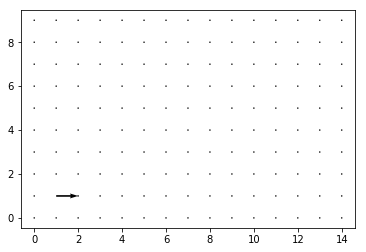

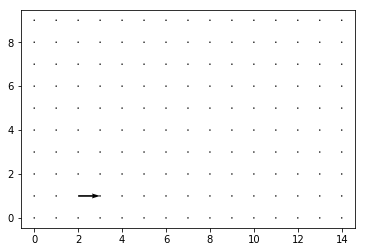

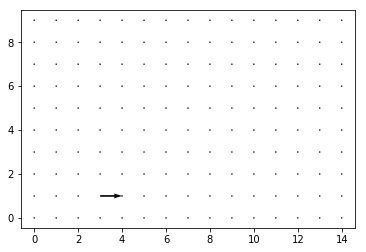

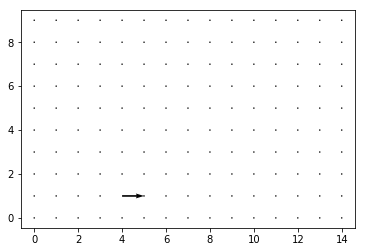

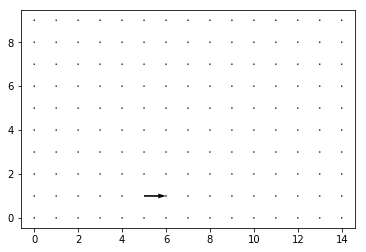

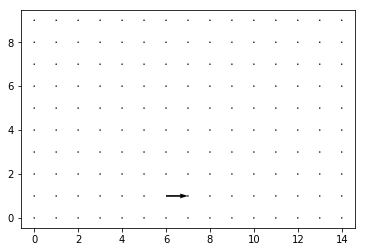

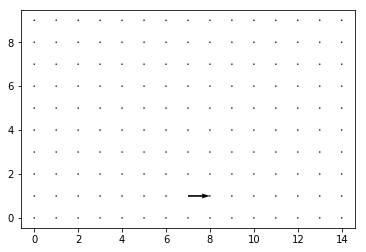

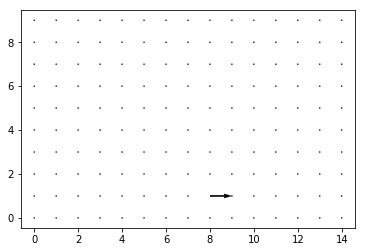

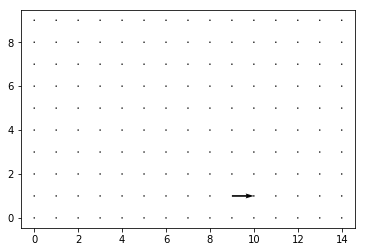

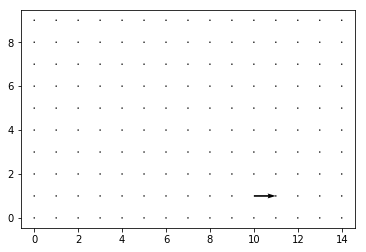

In [7]:
for i in range(timestep): #plot the particle movement for the number of given timesteps
    plt.subplots()
    plt.axis('equal')
    plt.quiver(X, Y, vel_x, vel_y, scale=1, units='xy')
    plt.show()
    f,vel_x,vel_y,rho=streaming(f) #shift the particles after each plot